<a href="https://colab.research.google.com/github/Pakhi27/DS304_LabAssignment4_22bds042./blob/main/DS304_LabAssignment4_22bds042.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/content/NIRF_Overall_2024.csv")

In [3]:
dataset=pd.DataFrame(df)

In [4]:
df

,Unnamed: 0,Institute ID,Name,City,State,Score,Rank
0,0,IR-O-U-0456,Indian Institute of Technology Madras,Chennai,Tamil Nadu,86.42,1
1,1,IR-O-U-0220,"Indian Institute of Science, Bengaluru",Bengaluru,Karnataka,83.28,2
2,2,IR-O-U-0306,Indian Institute of Technology Bombay,Mumbai,Maharashtra,81.37,3
3,3,IR-O-I-1074,Indian Institute of Technology Delhi,New Delhi,Delhi,80.31,4
4,4,IR-O-I-1075,Indian Institute of Technology Kanpur,Kanpur,Uttar Pradesh,77.56,5
...,...,...,...,...,...,...,...
95,95,IR-O-I-1486,Sri Ramachandra Institute of Higher Education ...,Chennai,Tamil Nadu,48.10,96
96,96,IR-O-U-0003,Acharya Nagarjuna University,Guntur,Andhra Pradesh,47.73,97
97,97,IR-O-U-0331,Tata Institute of Social Sciences,Mumbai,Maharashtra,47.56,98
98,98,IR-O-U-0686,All India Institute of Medical Sciences Patna,Patna,Bihar,47.55,99


Categorize institutions into zones

In [6]:
# Define a mapping of states to zones
zones = {
    'Northern Zone': ['Chandigarh', 'Delhi', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Ladakh', 'Punjab', 'Rajasthan'],
    'North Eastern Zone': ['Assam', 'Arunachal Pradesh', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Sikkim', 'Tripura'],
    'Central Zone': ['Chhattisgarh', 'Madhya Pradesh', 'Uttarakhand', 'Uttar Pradesh'],
    'Eastern Zone': ['Bihar', 'Jharkhand', 'Odisha', 'West Bengal'],
    'Western Zone': ['Dadra and Nagar Haveli and Daman and Diu', 'Goa', 'Gujarat', 'Maharashtra'],
    'Southern Zone': ['Andhra Pradesh', 'Karnataka', 'Kerala', 'Puducherry', 'Tamil Nadu', 'Telangana', 'Andaman and Nicobar']
}

# Create a function to assign zone based on state
def assign_zone(state):
    for zone, states in zones.items():
        if state in states:
            return zone
    return None

# Apply the function to create the 'Zone / Zonal Region' column
df['Zone / Zonal Region'] = df['State'].apply(assign_zone)

# Check the updated dataframe
df.head()


,Unnamed: 0,Institute ID,Name,City,State,Score,Rank,Zone / Zonal Region
0,0,IR-O-U-0456,Indian Institute of Technology Madras,Chennai,Tamil Nadu,86.42,1,Southern Zone
1,1,IR-O-U-0220,"Indian Institute of Science, Bengaluru",Bengaluru,Karnataka,83.28,2,Southern Zone
2,2,IR-O-U-0306,Indian Institute of Technology Bombay,Mumbai,Maharashtra,81.37,3,Western Zone
3,3,IR-O-I-1074,Indian Institute of Technology Delhi,New Delhi,Delhi,80.31,4,Northern Zone
4,4,IR-O-I-1075,Indian Institute of Technology Kanpur,Kanpur,Uttar Pradesh,77.56,5,Central Zone


Visualize the top 5 states with the highest number of ranked institutions


<ipython-input-30-1e590c26644c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='plasma')


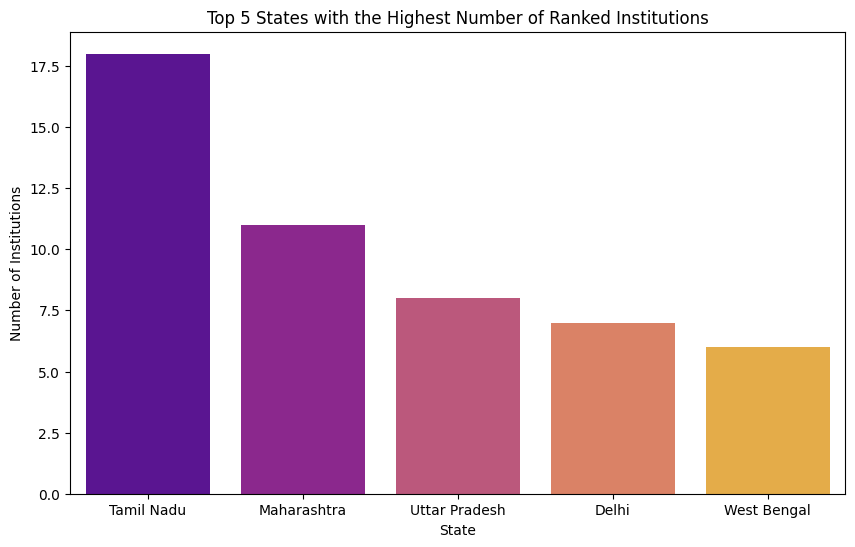

In [30]:

# Count the number of institutions per state
state_counts = df['State'].value_counts().head(5)

# Bar plot showing the top 5 states with the highest number of ranked institutions (axes flipped)
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='plasma')
plt.title('Top 5 States with the Highest Number of Ranked Institutions')
plt.xlabel('State')
plt.ylabel('Number of Institutions')
plt.xticks()  # Rotate the x-axis labels for clarity
plt.show()



Identify states that could benefit from increased investment in education

<ipython-input-25-a4f15173d4f8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_100_state_counts.index, y=top_100_state_counts.values, palette='viridis')


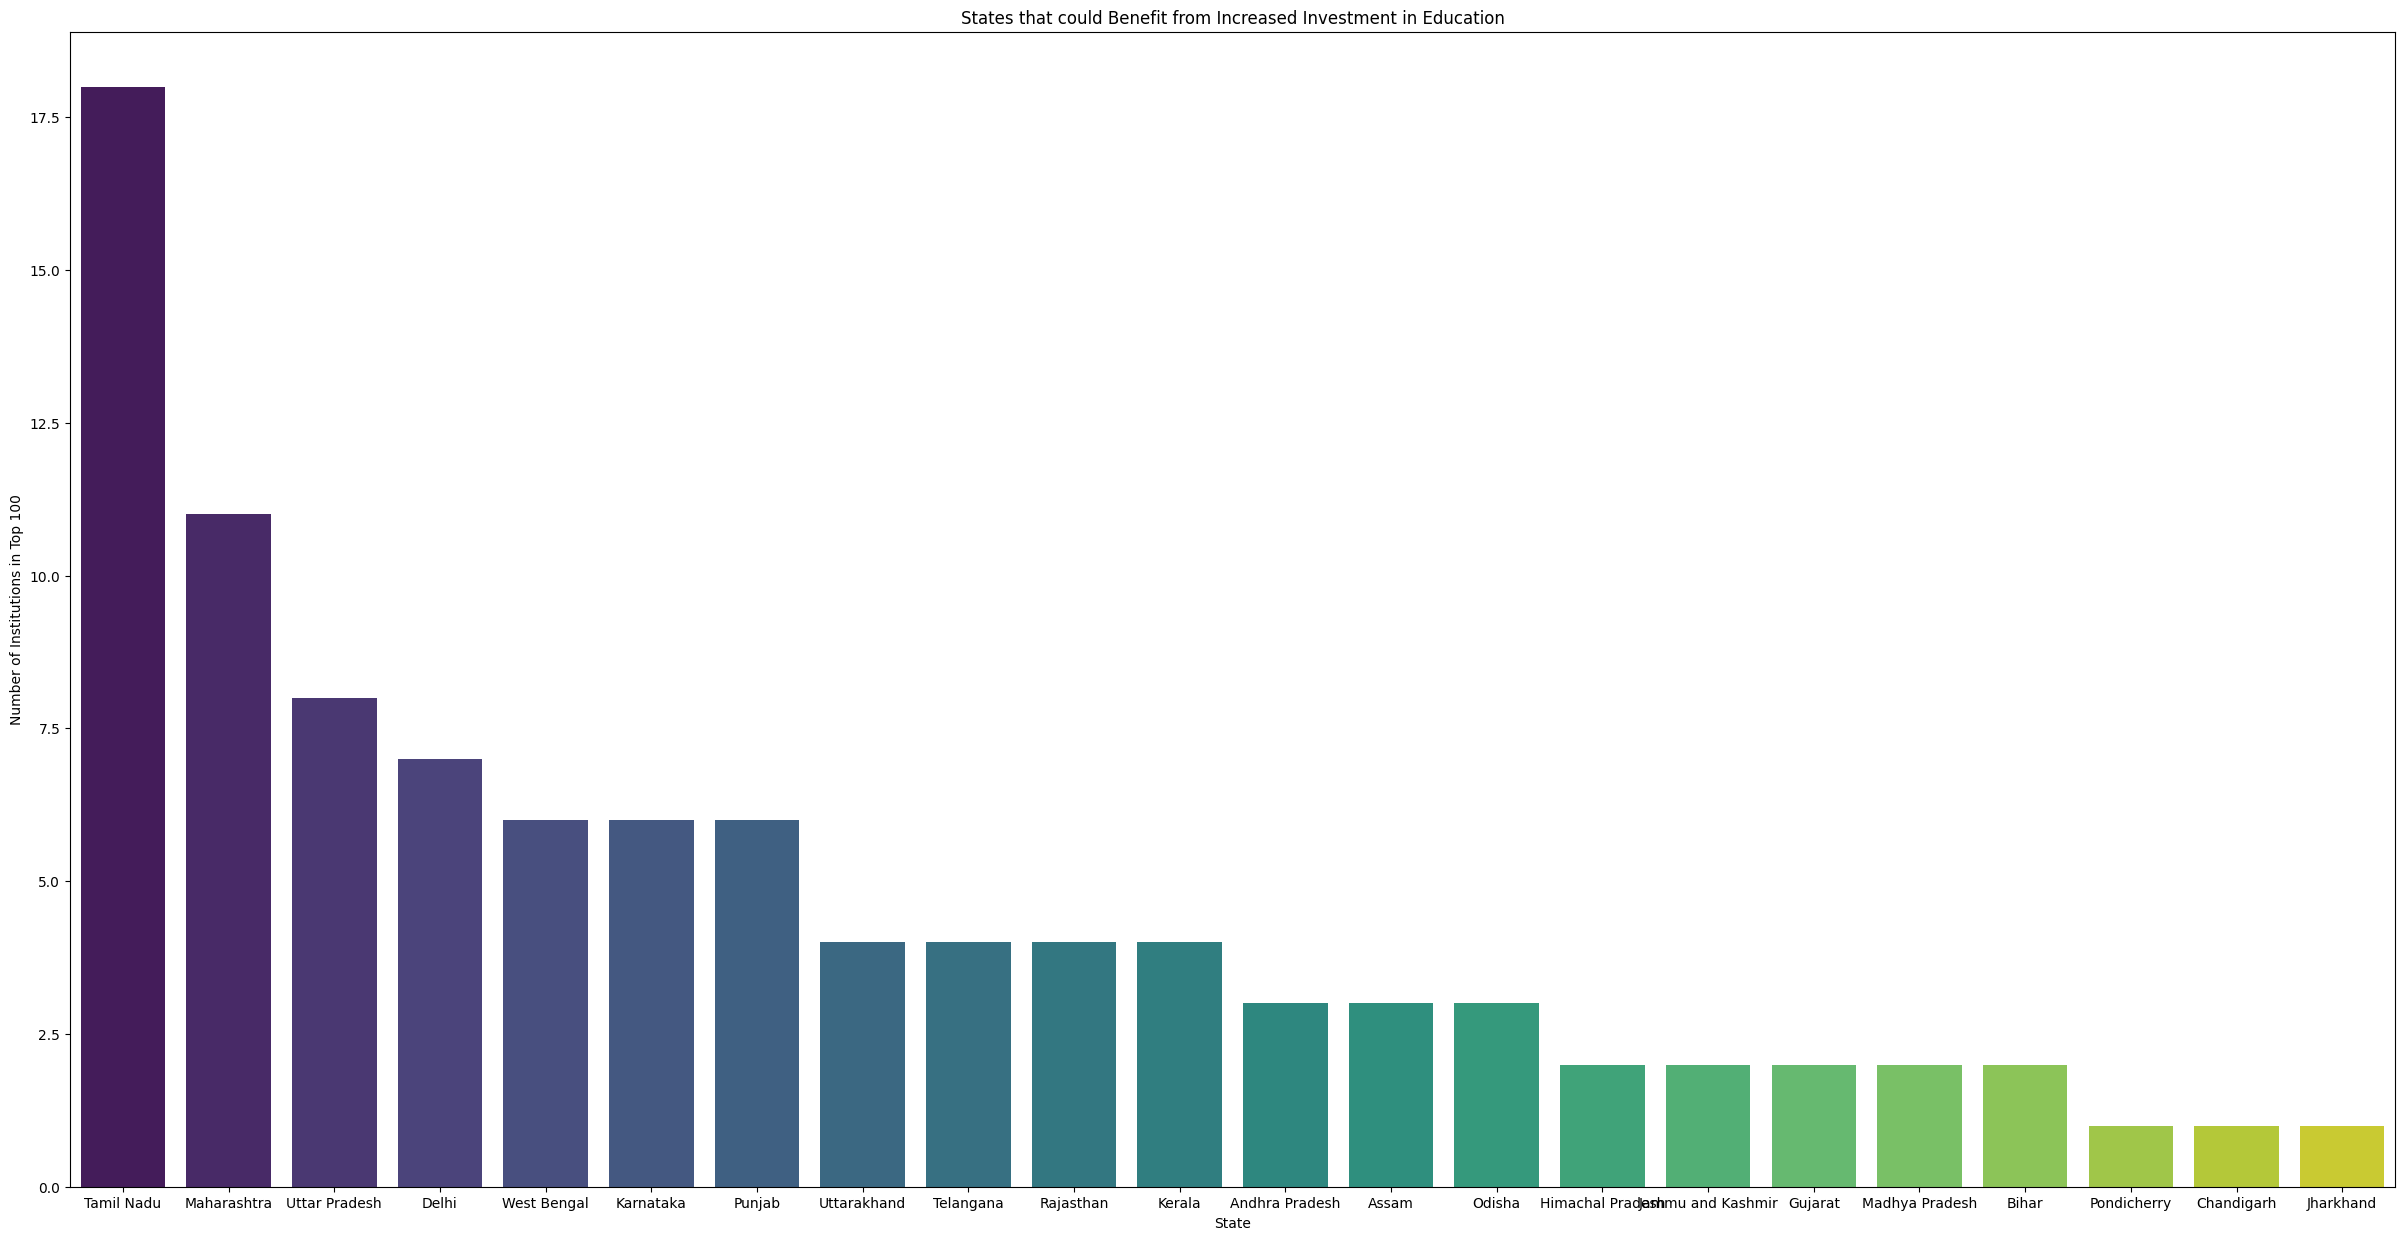

States with no institutions in the top 100: []


In [25]:
# Filter institutions that are ranked in the top 100
top_100 = df[df['Rank'] <= 100]

# Count the number of top 100 institutions per state
top_100_state_counts = top_100['State'].value_counts()

# Find states with no institutions in the top 100
states_no_top_100 = df[~df['State'].isin(top_100['State'].unique())]['State'].unique()

# Plot the states with low presence in the top 100 (Rotated graph - x and y axes swapped)
plt.figure(figsize=(30, 15))
sns.barplot(x=top_100_state_counts.index, y=top_100_state_counts.values, palette='viridis')
plt.title('States that could Benefit from Increased Investment in Education')
plt.xlabel('State')
plt.ylabel('Number of Institutions in Top 100')
plt.xticks()  # Keep the x-axis labels rotated for clarity
plt.show()


print("States with no institutions in the top 100:", states_no_top_100)


Which zone has the highest representation in the NIRF rankings?

<ipython-input-32-2584daee3118>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_counts.index, y=zone_counts.values, palette='coolwarm')


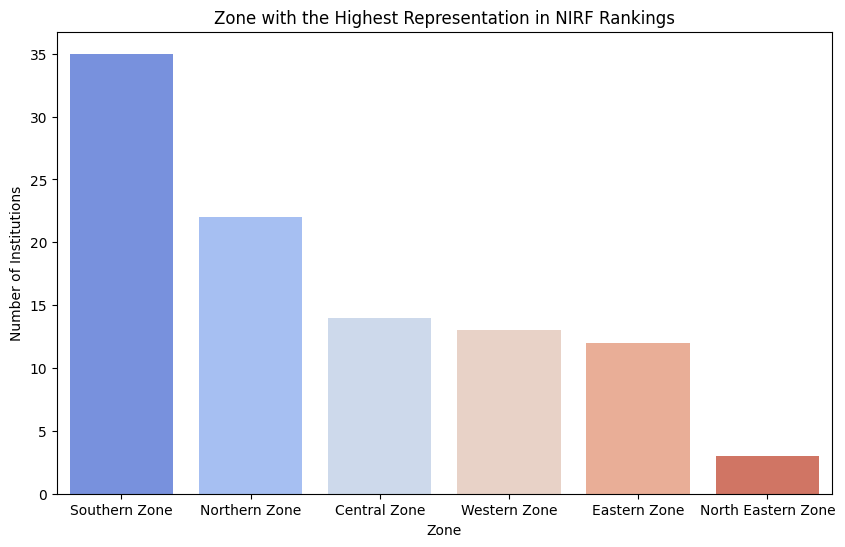

In [32]:
# Count the number of institutions per zone
zone_counts = df['Zone / Zonal Region'].value_counts()

# Bar plot showing the representation of each zone in NIRF rankings (axes flipped)
plt.figure(figsize=(10, 6))
sns.barplot(x=zone_counts.index, y=zone_counts.values, palette='coolwarm')
plt.title('Zone with the Highest Representation in NIRF Rankings')
plt.xlabel('Zone')
plt.ylabel('Number of Institutions')
plt.xticks()  # Rotate the x-axis labels for clarity
plt.show()



Visualizations to discuss "Lie Factor"

In [ ]:
# Lie Factor refers to how visualizations can distort information and mislead viewers. Two visualizations of the same data can provide very different impressions, even if the underlying numbers are the same.

<ipython-input-27-5eaa0f53ea38>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zone_counts.index, y=zone_counts.values, palette='plasma')


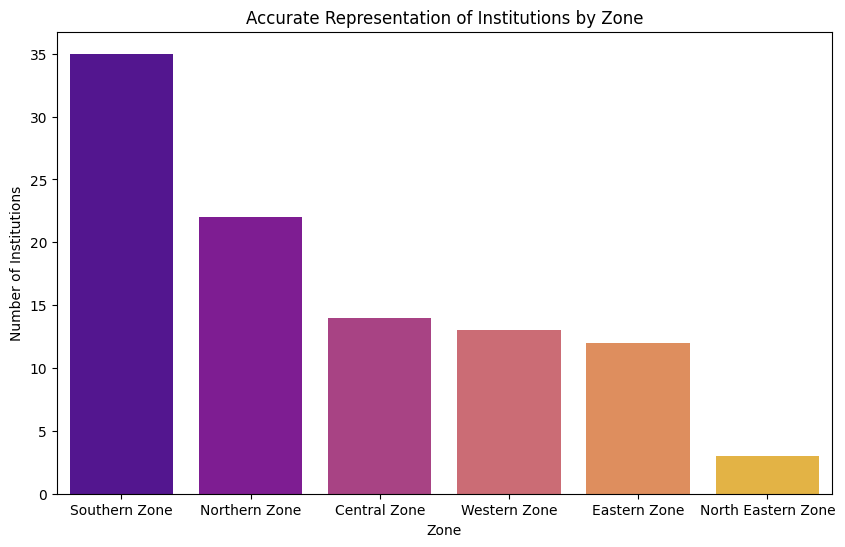

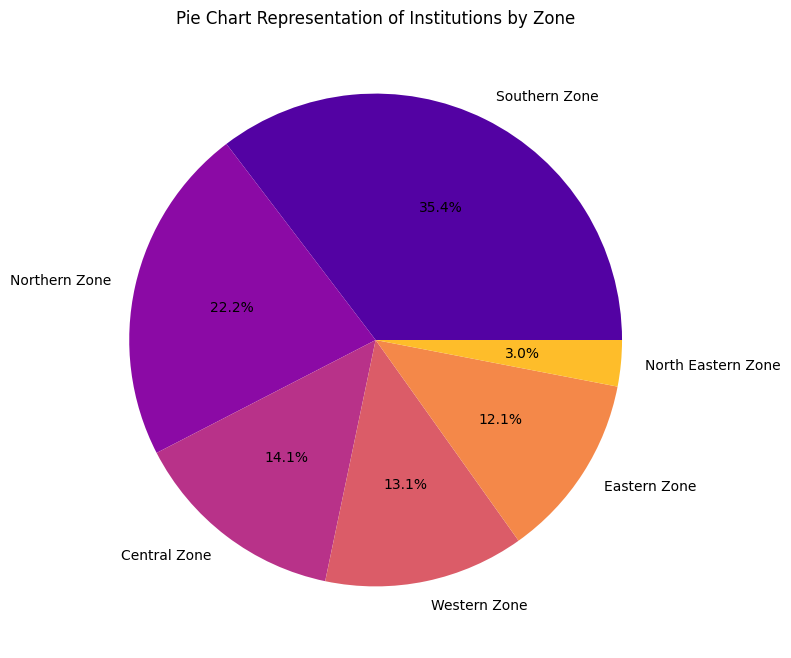

In [27]:
# Visualization 1 - Barplot (Rotated graph - x and y axes swapped)
plt.figure(figsize=(10, 6))
sns.barplot(x=zone_counts.index, y=zone_counts.values, palette='plasma')
plt.title('Accurate Representation of Institutions by Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Institutions')
plt.xticks()  # Rotate the x-axis labels for clarity
plt.show()

# Visualization 2 - Pie chart (remains the same as pie charts cannot be rotated this way)
plt.figure(figsize=(8, 8))
plt.pie(zone_counts.values, labels=zone_counts.index, autopct='%1.1f%%', colors=sns.color_palette('plasma'))
plt.title('Pie Chart Representation of Institutions by Zone')
plt.show()


# Lie Factor Discussion:
# - The bar plot gives an accurate and easy-to-interpret visual of the counts per zone.
# - The pie chart, while visually appealing, can be misleading, especially when small differences in zone counts appear more pronounced. It may overemphasize smaller proportions.


 Visualize the distribution of scores among all institutions

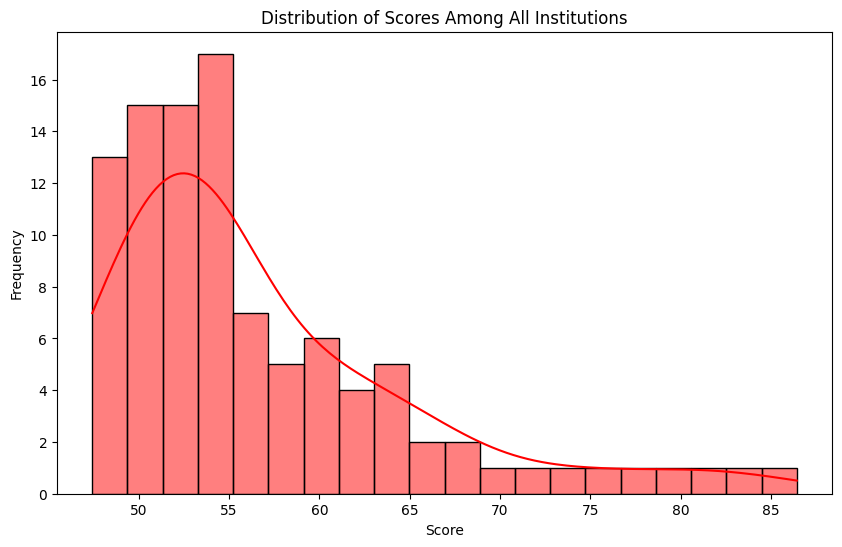

In [14]:
# Plot the distribution of scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Score'], bins=20, kde=True, color='red')
plt.title('Distribution of Scores Among All Institutions')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()
